## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy, os
from netCDF4 import Dataset
%matplotlib inline

# Ny-Ålesund LIDAR aerosol profiles


## Dataset resources

**Title:** Lidar aerosol properties over Ny-Alesund during May-June 2017

**Author** Ritter, Christoph

**Year** 2019

**Institute** 

**Data hosted by** [PANGAEA](https://pangaea.de)

**DOI**  [10.1594/PANGAEA.900423](https://doi.org/10.1594/PANGAEA.900423)

**License** [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")


## Abstract
The "Koldewey Aerosol Raman Lidar" provides the aerosol backscatter coefficient in [1/(m*sr)] for the wavelengths 355nm, 532nm and 1064nm and for the first mentioned wavelengths additionally the aerosol depolarization [%]. The data comprise the time of the ACLOUD / PASCAL campaigns from late May to end June 2017. Format is netcdf

## Reading example dataset

The dataset can be downloaded via the link above and saved in the current working directory of this notebook. After checking the headersize of the ASCII file, the table can be read as a NumPy record array. The print statement checks the loaded fields in the recarray.

In [3]:
datafolder = '../ac3/INF/pangaea_download/'
fname = 'karl-170527-170623.nc'
rootgrp = Dataset(os.path.join(datafolder,fname), 'r', format="NETCDF4")
print (rootgrp.variables.keys())

odict_keys(['Time', 'MatlabTime', 'Height', 'P355', 'P355S', 'BetaAer355tot', 'BetaAer355toterr', 'LR355', 'AeroDep355', 'AeroDep355err', 'P532', 'P532S', 'BetaAer532tot', 'BetaAer532toterr', 'LR532', 'AeroDep532', 'AeroDep532err', 'P1064', 'BetaAer1064', 'BetaAer1064err', 'LR1064'])


In [4]:
time = rootgrp.variables['MatlabTime'][:]
height = rootgrp.variables['Height'][:]
LR355 = rootgrp.variables['LR355'][:]
P355 = rootgrp.variables['P355'][:]
LR355descr = rootgrp.variables['LR355'].description
P355descr = rootgrp.variables['P355'].description
LR355units = rootgrp.variables['LR355'].units
P355units = rootgrp.variables['P355'].units

## Plot

As an overview, the data fields can be plotted against time. Time is converted from Matlab-time (beginning 0000-00-00) to datetime objects.

In [5]:
#time2 = [dt.datetime(1,1,1)+dt.timedelta(days=np.floor(i[0])-366, hours=(i[0]-np.floor(i[0]))*24) for i in time.data]
time2 = np.array(mdates.num2date(time-365))
Time, Height = np.meshgrid(time2.flatten(), height.flatten())


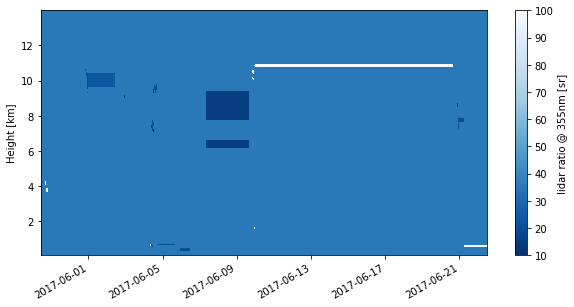

In [7]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.set_ylabel('Height [km]')
con = ax.pcolor(Time, Height/1e3, LR355.T, cmap=plt.get_cmap('Blues_r'), vmin=10, vmax=100)
fig.colorbar(con, label=LR355descr+' '+LR355units)
fig.autofmt_xdate()

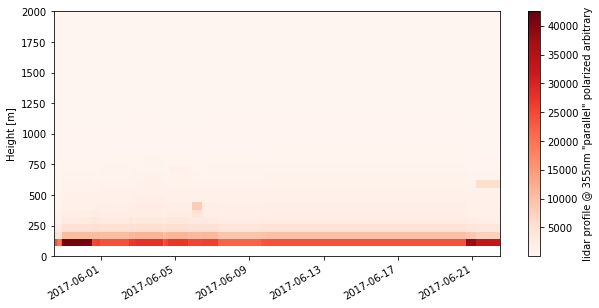

In [12]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.set_ylabel('Height [m]')
ax.set_ylim(0,2000)
con = ax.pcolormesh(Time, Height, P355.T, cmap=plt.get_cmap('Reds'))
fig.colorbar(con, label=P355descr+' '+P355units)
fig.autofmt_xdate()